# Explore & Split the dataset into train and test sets

## Simple EDA

In [1]:
import pandas as pd
from pathlib import Path

In [2]:
data_path = Path("../datasets/cars.csv")
cars = pd.read_csv(data_path)

cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
cars.shape

(8128, 13)

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
cars.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
cars.describe(include="object")

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,8128,8128,8128,8128,8128,7907,7907,7913,7906
unique,2058,4,3,2,5,393,121,322,441
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,129,4402,6766,7078,5289,225,1017,377,530


array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'selling_price'}>],
       [<Axes: title={'center': 'km_driven'}>,
        <Axes: title={'center': 'seats'}>]], dtype=object)

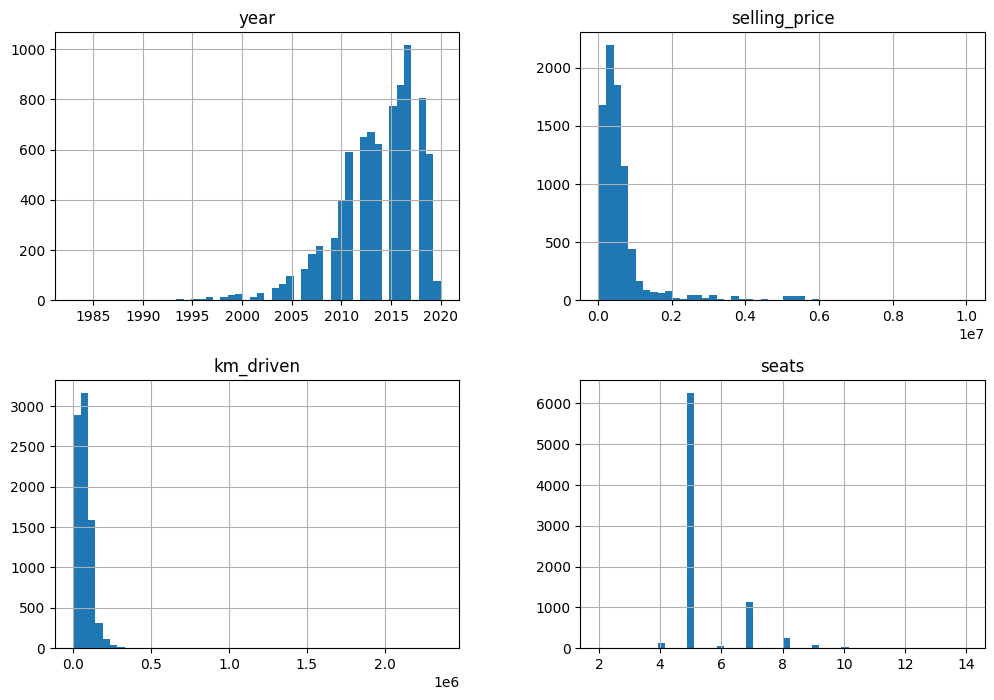

In [7]:
cars.hist(bins=50, figsize=(12, 8))

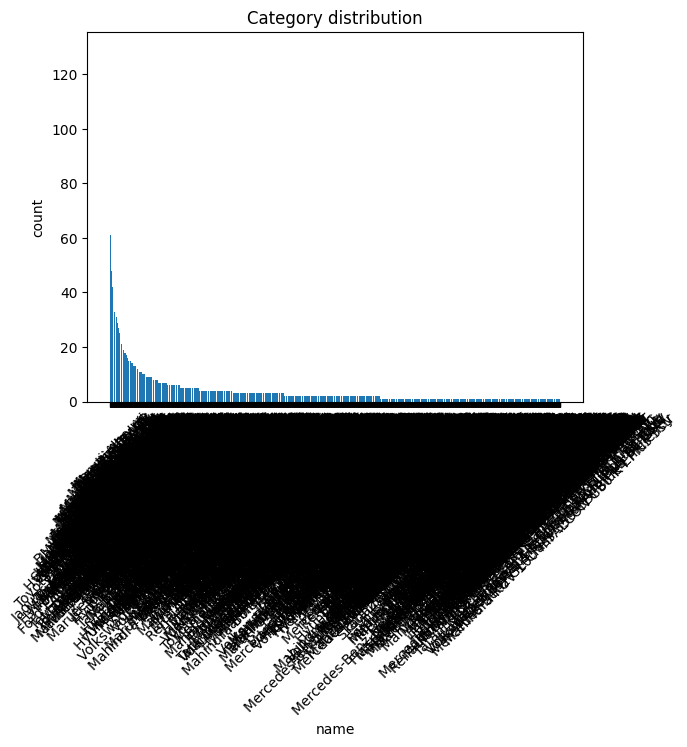

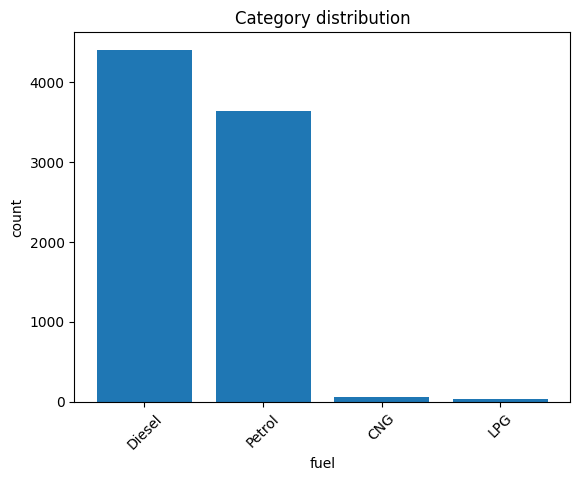

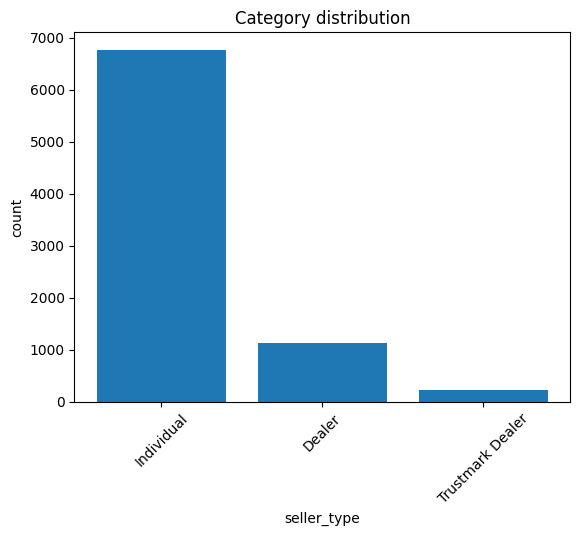

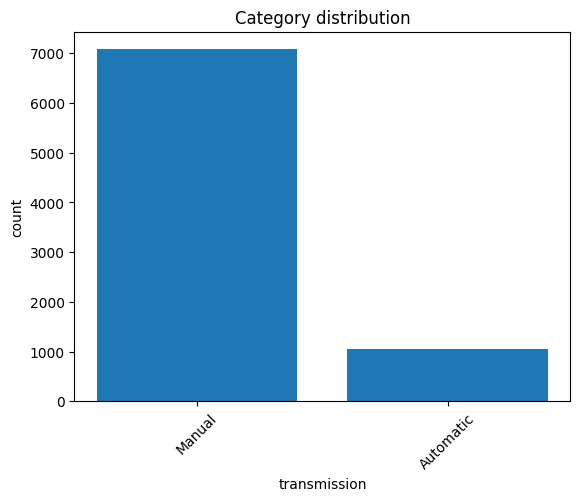

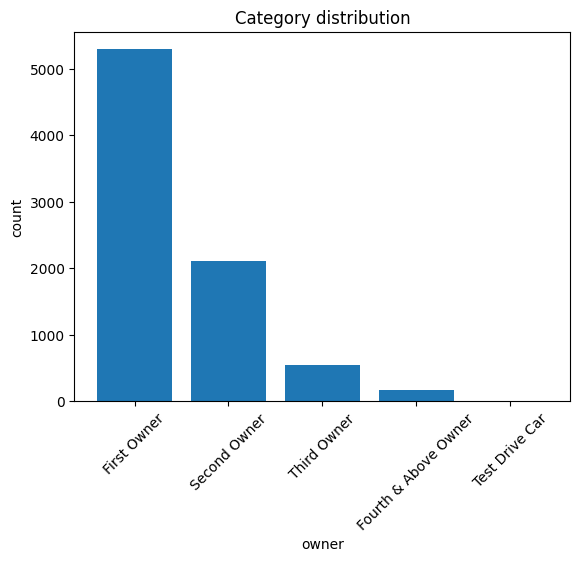

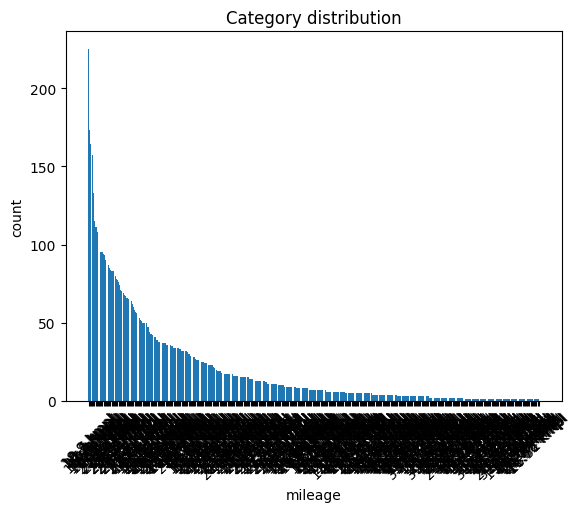

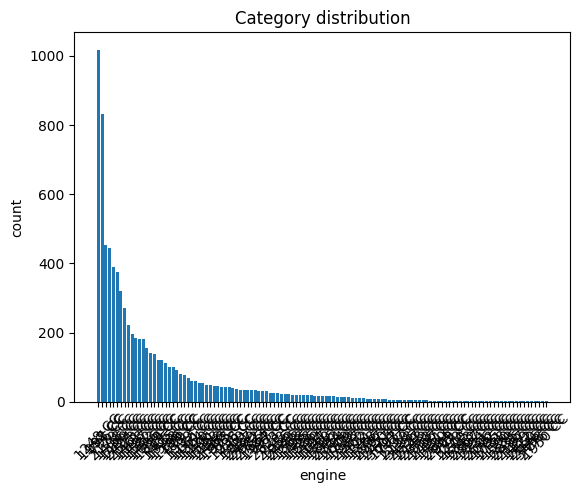

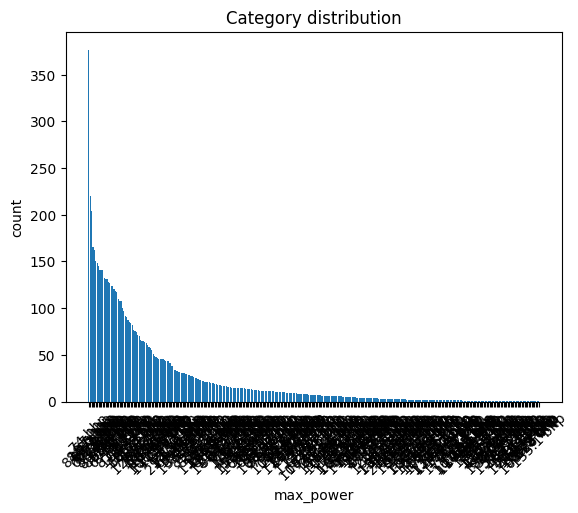

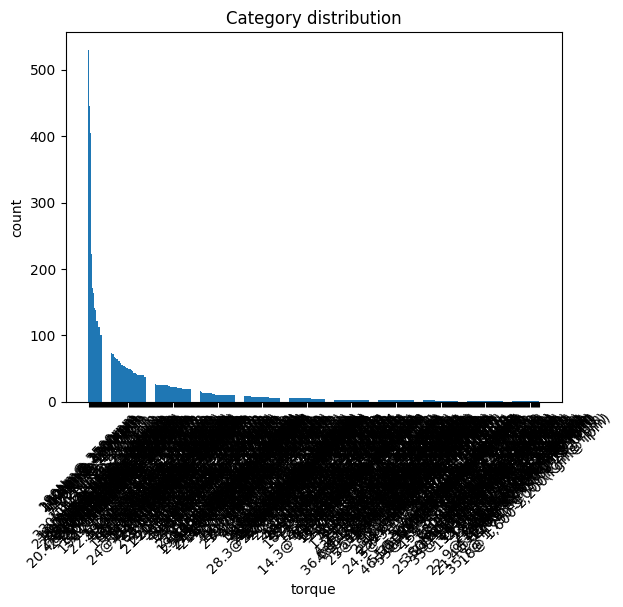

In [8]:
import matplotlib.pyplot as plt

cat_features = cars.select_dtypes(include=['object']).columns

for feature in cat_features:
    counts = cars[feature].value_counts()

    plt.bar(counts.index, counts.values)
    plt.xticks(rotation=45)
    plt.ylabel("count")
    plt.xlabel(feature)
    plt.title("Category distribution")
    plt.show()


# Split the dataset

We will use stratified sampling, so we can take care for each car manufactor

In [9]:
name_counts = cars['name'].value_counts()
name_counts

name
Maruti Swift Dzire VDI              129
Maruti Alto 800 LXI                  82
Maruti Alto LXi                      71
BMW X4 M Sport X xDrive20d           62
Maruti Swift VDI                     61
                                   ... 
Maruti 800 DX BSII                    1
Ford Figo Aspire Titanium Diesel      1
Hyundai Verna CRDi 1.6 SX             1
Maruti Baleno Alpha Diesel            1
Tata New Safari Dicor VX 4X2          1
Name: count, Length: 2058, dtype: int64

In [10]:
len(name_counts[name_counts > 10])

148

In [11]:
# get the first word from cars['name'] and put it in new column 'manufactor'
cars['manufactor'] = cars['name'].str.split(n=1).str[0]

In [12]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,manufactor
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti


In [13]:
threshold = 10
freq = cars['manufactor'].value_counts()
rare_manufactors = freq[freq < threshold].index

cars['manufactor'] = cars['manufactor'].replace(rare_manufactors, 'other')

cars['manufactor'].value_counts()


manufactor
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
other              34
Jeep               31
Mitsubishi         14
Name: count, dtype: int64

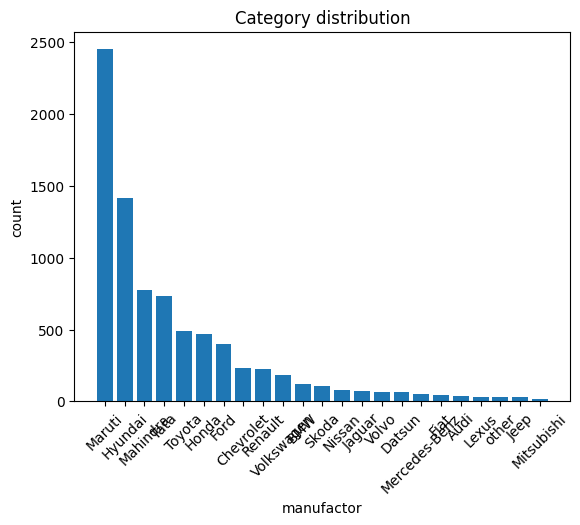

In [14]:
counts = cars['manufactor'].value_counts()

plt.bar(counts.index, counts.values)
plt.xticks(rotation=45)
plt.ylabel("count")
plt.xlabel('manufactor')
plt.title("Category distribution")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(cars, test_size=0.2, random_state=42, stratify=cars['manufactor'])

In [16]:
strat_train_set.shape

(6502, 14)

In [17]:
strat_test_set.shape

(1626, 14)

In [18]:
strat_train_set.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,manufactor
1823,Mahindra Quanto C2,2013,450000,52000,Diesel,Individual,Manual,First Owner,17.21 kmpl,1493 CC,100 bhp,240Nm@ 1600-2800rpm,7.0,Mahindra
6333,Maruti Ertiga ZXI,2015,570000,80000,Petrol,Individual,Manual,First Owner,16.02 kmpl,1373 CC,93.7 bhp,130Nm@ 4000rpm,7.0,Maruti
1126,Toyota Etios VX,2017,625000,25538,Petrol,Trustmark Dealer,Manual,First Owner,16.78 kmpl,1496 CC,88.73 bhp,132Nm@ 3000rpm,5.0,Toyota
6371,Ford Endeavour 2.2 Titanium AT 4X2,2016,2400000,30000,Diesel,Individual,Automatic,First Owner,12.62 kmpl,2198 CC,158 bhp,385Nm@ 1600-2500rpm,7.0,Ford
5298,Tata Safari Storme LX,2014,575000,55000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2179 CC,138.1 bhp,320Nm@ 1700-2700rpm,7.0,Tata


In [19]:
def manufactor_proportions(data):
    return data["manufactor"].value_counts() / len(data)

train_set, test_set = train_test_split(cars, test_size=0.2,
                                       random_state=42)

compare_props = pd.DataFrame({
    "Overall %": manufactor_proportions(cars),
    "Stratified %": manufactor_proportions(strat_test_set),
    "Random %": manufactor_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
Audi,0.49,0.49,0.62,-0.02,24.97
BMW,1.48,1.48,1.48,-0.02,-0.02
Chevrolet,2.83,2.83,2.77,-0.02,-2.20
Datsun,0.80,0.80,1.05,-0.02,30.74
Fiat,0.58,0.55,0.74,-4.28,27.63
Ford,4.88,4.86,4.74,-0.53,-3.05
Honda,5.75,5.72,6.03,-0.45,4.90
Hyundai,17.41,17.40,17.71,-0.02,1.74
Jaguar,0.87,0.86,0.74,-1.43,-15.51


In [20]:
train_set.drop(columns=['manufactor'], inplace=True)
test_set.drop(columns=['manufactor'], inplace=True)
train_set.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6518,Tata Tiago NRG Petrol AMT,2019,520000,2560,Petrol,Individual,Automatic,First Owner,24.0 kmpl,1199 CC,83.81 bhp,114Nm@ 3500rpm,5.0
6144,Honda Brio S MT,2013,300000,80000,Petrol,Individual,Manual,Second Owner,19.4 kmpl,1198 CC,86.8 bhp,109Nm@ 4500rpm,5.0
6381,Hyundai i20 1.4 CRDi Asta,2011,380000,150000,Diesel,Individual,Manual,Fourth & Above Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
438,Maruti Swift Dzire VDI,2013,530000,120000,Diesel,Individual,Manual,Second Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
5939,Maruti Alto K10 VXI,2017,335000,25000,Petrol,Individual,Manual,First Owner,23.95 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0


In [21]:
train_path = Path("../datasets/train.csv")
test_path = Path("../datasets/test.csv")

train_set.to_csv(train_path, index=False)
test_set.to_csv(test_path, index=False)